In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds-trainset/train.csv
/kaggle/input/diamonds-trainset/test.csv


In [2]:
def load_train_data():
    return pd.read_csv('../input/diamonds-trainset/train.csv')

In [3]:
traindata=load_train_data()
traindata.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
2,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
3,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
4,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47


In [4]:
traindata=traindata.drop('Unnamed: 0',axis=1)

In [5]:
traindata.head()
traindata.shape

(43040, 10)

In [6]:
traindata.info() #all cells are non-null
traindata.isna().sum()#to make sure there is no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43040 entries, 0 to 43039
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    43040 non-null  float64
 1   cut      43040 non-null  object 
 2   color    43040 non-null  object 
 3   clarity  43040 non-null  object 
 4   depth    43040 non-null  float64
 5   table    43040 non-null  float64
 6   price    43040 non-null  int64  
 7   x        43040 non-null  float64
 8   y        43040 non-null  float64
 9   z        43040 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.3+ MB


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
traindata.describe()# the object columns don't appear here

,carat,depth,table,price,x,y,z
count,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000,43040.000000
mean,0.796964,61.746080,57.439542,3942.706343,5.724376,5.728122,3.534367
std,0.481455,1.435246,2.240196,4023.534556,1.132496,1.159641,0.714543
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.380000,61.000000,56.000000,940.000000,4.660000,4.670000,2.870000
50%,0.710000,61.800000,57.000000,2388.000000,5.710000,5.720000,3.530000
75%,1.030000,62.500000,59.000000,5309.250000,6.500000,6.500000,4.020000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [8]:
#x,y,z can not be 0 ,so we must drop rows with 0 value for x,y,z
print(f"{((traindata['x']==0).sum())} zeros in column x")
print(f"{((traindata['y']==0).sum())} zeros in column y")
print(f"{((traindata['z']==0).sum())} zeros in column z")
#there are a few rows with zeros for x,y,z so we are able to drop it
traindata=traindata.drop(traindata[traindata['x']==0].index)
traindata=traindata.drop(traindata[traindata['y']==0].index)
traindata=traindata.drop(traindata[traindata['z']==0].index)
traindata.shape  #make sure that zeros dropped

7 zeros in column x
6 zeros in column y
17 zeros in column z


(43023, 10)

In [9]:
print(traindata['clarity'].value_counts())
print('#'*50)
print(traindata['cut'].value_counts())
print('#'*50)
print(traindata['color'].value_counts())

SI1     10361
VS2      9978
SI2      7372
VS1      6478
VVS2     3959
VVS1     2838
IF       1483
I1        554
Name: clarity, dtype: int64
##################################################
Ideal        17422
Premium      11022
Very Good     9406
Good          3906
Fair          1267
Name: cut, dtype: int64
##################################################
G    9074
E    7723
F    7523
H    6634
D    5555
I    4296
J    2218
Name: color, dtype: int64


array([[<AxesSubplot:title={'center':'carat'}>,
        <AxesSubplot:title={'center':'depth'}>,
        <AxesSubplot:title={'center':'table'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'x'}>,
        <AxesSubplot:title={'center':'y'}>],
       [<AxesSubplot:title={'center':'z'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

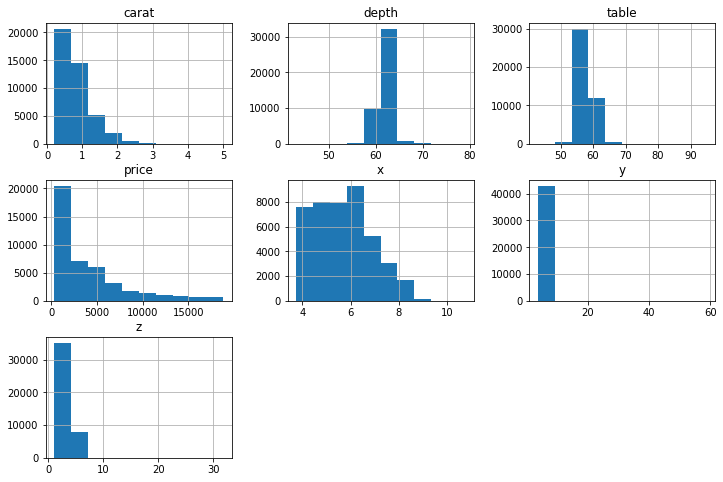

In [10]:
traindata.hist(figsize=(12,8))

In [12]:
#From the previous plot we can see many ouliers points in x,y,z and depth, so we're going to delete it

In [10]:
traindata=traindata[(traindata['depth']<75)&(traindata['depth']>50)]
traindata=traindata[(traindata['table']<80)&(traindata['table']>40)]
traindata=traindata[(traindata['x']<30)]
traindata=traindata[(traindata['y']<30)]
traindata=traindata[(traindata['z']<30)&(traindata['z']>2)]
traindata.shape

(43010, 10)

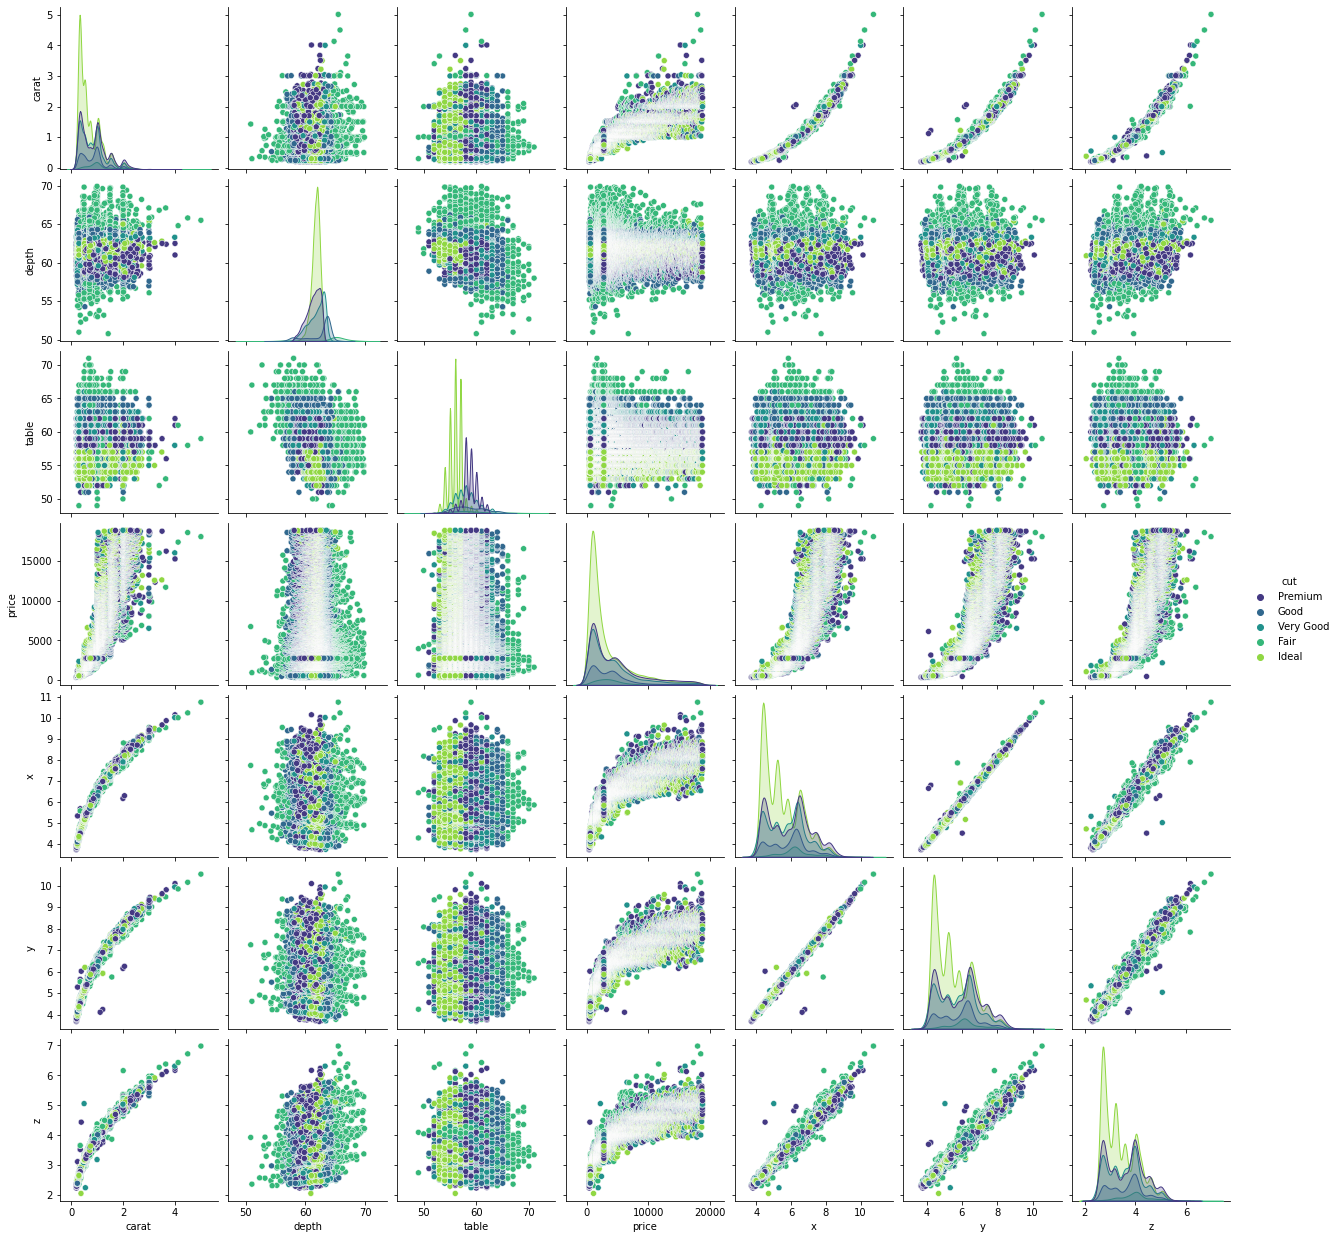

In [14]:
plot3=sns.pairplot(data=traindata,hue='cut',palette='viridis')

In [11]:
traindata.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.023806,0.191550,0.923756,0.977255,0.976245,0.976423
depth,0.023806,1.000000,-0.300023,-0.013994,-0.030114,-0.033009,0.091307
table,0.191550,-0.300023,1.000000,0.137028,0.205910,0.199482,0.165677
price,0.923756,-0.013994,0.137028,1.000000,0.890199,0.891676,0.885660
x,0.977255,-0.030114,0.205910,0.890199,1.000000,0.998746,0.991722
y,0.976245,-0.033009,0.199482,0.891676,0.998746,1.000000,0.991384
z,0.976423,0.091307,0.165677,0.885660,0.991722,0.991384,1.000000


<AxesSubplot:>

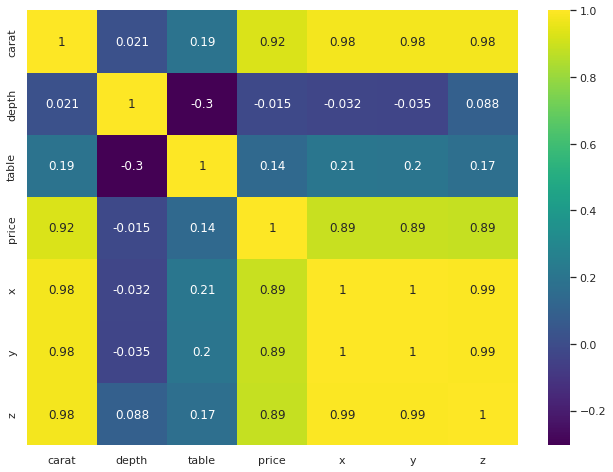

In [16]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(traindata.corr(),annot=True,cmap='viridis')

In [12]:
corr1= traindata.corr()
corr1["price"].sort_values(ascending=False)


price    1.000000
carat    0.923756
y        0.891676
x        0.890199
z        0.885660
table    0.137028
depth   -0.013994
Name: price, dtype: float64

In [13]:
#let's work on object columns
print(traindata["cut"].unique())
print('#'*50)
print(traindata["clarity"].unique())
print('#'*50)
print(traindata["color"].unique())
print('#'*50)

['Premium' 'Good' 'Very Good' 'Fair' 'Ideal']
##################################################
['SI1' 'VS2' 'SI2' 'VVS2' 'VVS1' 'I1' 'VS1' 'IF']
##################################################
['E' 'I' 'J' 'F' 'H' 'D' 'G']
##################################################


In [14]:
from sklearn.preprocessing import LabelEncoder
objected_data=traindata.copy()
label_data=objected_data[['cut','clarity','color']]
label_endcoder=LabelEncoder()
for col in label_data:
    objected_data[col]=label_endcoder.fit_transform(objected_data[col])
objected_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
1,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
2,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
3,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
4,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47


In [15]:
objected_data.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,43010.000000,43010.000000,43010.000000,43010.000000,43010.000000,43010.000000,43010.000000,43010.000000,43010.000000,43010.000000
mean,0.796597,2.544129,2.587329,3.832155,61.746478,57.438019,3940.242432,5.724666,5.726480,3.535003
std,0.481148,1.021255,1.703638,1.716627,1.419608,2.229718,4021.053435,1.129873,1.121725,0.697456
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.380000,2.000000,1.000000,2.000000,61.000000,56.000000,939.000000,4.660000,4.670000,2.870000
50%,0.710000,2.000000,3.000000,4.000000,61.800000,57.000000,2387.000000,5.710000,5.720000,3.530000
75%,1.030000,3.000000,4.000000,5.000000,62.500000,59.000000,5305.750000,6.500000,6.500000,4.020000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<AxesSubplot:>

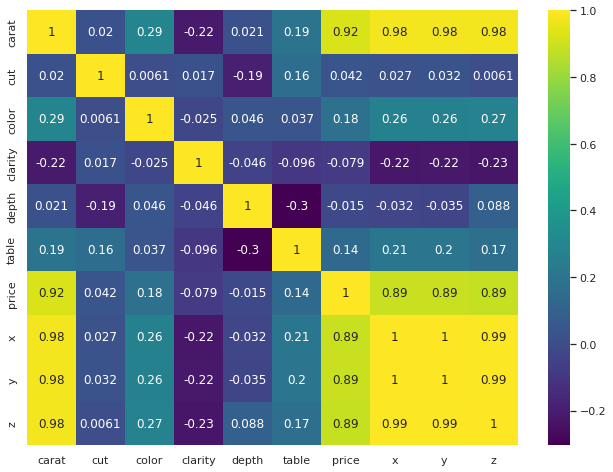

In [21]:
#we use corr after labeling the objected columns
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(objected_data.corr(),annot=True,cmap='viridis')

In [16]:
testdata=pd.read_csv('../input/diamonds-trainset/test.csv')
testdata.drop('Unnamed: 0',axis=1,inplace=True)
objected_test=testdata.copy()
label_test=objected_test[['cut','clarity','color']]
label_endcoder=LabelEncoder()
for col in label_test:
    objected_test[col]=label_endcoder.fit_transform(objected_test[col])
objected_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
2,0.26,4,4,2,61.9,55.0,4.07,4.11,2.53
3,0.23,4,4,4,59.4,61.0,4.00,4.05,2.39
4,0.23,2,6,4,62.8,56.0,3.93,3.90,2.46


In [17]:
testid=pd.read_csv('../input/diamonds-trainset/test.csv')
testid.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z'],
      dtype='object')

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
X_train=objected_data.drop('price',axis=1)
X_test=objected_test
y_train=objected_data['price']
SS=StandardScaler()
X_train=SS.fit_transform(X_train)
X_test=SS.fit_transform(X_test)
poly = PolynomialFeatures(2)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)
#SS=StandardScaler()
#X_train=SS.fit_transform(X_train)
#X_test=SS.fit_transform(X_test)
#y_train=SS.fit_transform(y_train)
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
lin_predictions=lin_reg.predict(X_test)
lin_submission=pd.DataFrame()
lin_submission['Unnamed: 0']=testid['Unnamed: 0']
lin_submission['price']=lin_predictions
lin_submission
lin_submission.to_csv('linear_first_submission.csv',index=None)
read=pd.read_csv('./linear_first_submission.csv')

In [19]:
from sklearn.metrics import mean_squared_error
lin_predictions=lin_reg.predict(X_train)
lin_mse=mean_squared_error(y_train, lin_predictions)
lin_rmse=np.sqrt(lin_mse)
print(lin_rmse, '$')

1038.7752973847782 $


In [20]:
from sklearn.tree import DecisionTreeRegressor 
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
tree_predictions=tree_reg.predict(X_test)
tree_submission=pd.DataFrame()
tree_submission['Unnamed: 0']=testid['Unnamed: 0']
tree_submission['price']=tree_predictions
tree_submission
tree_submission.to_csv('tree_first_submission.csv',index=None)
read=pd.read_csv('./tree_first_submission.csv')
tree_predictions=tree_reg.predict(X_train)
tree_mse=mean_squared_error(y_train, tree_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

9.554034057267037

In [23]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)
forest_predictions=forest_reg.predict(X_test)
forest_submission=pd.DataFrame()
forest_submission['Unnamed: 0']=testid['Unnamed: 0']
forest_submission['price']=forest_predictions
forest_submission
forest_submission.to_csv('forest_first_submission.csv',index=None)
read=pd.read_csv('./forest_first_submission.csv')
forest_predictions=forest_reg.predict(X_train)
forest_mse=mean_squared_error(y_train, forest_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

206.38479441206914

In [24]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [25]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 739.80825359  979.76972064 1029.78523388 1418.37050041 2374.77316131
 1659.9145135   340.79237904  334.02347901  349.6871075   502.55947064]
Mean: 972.9483819524672
Standard deviation: 641.1422546620192


In [26]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [ 668.91148851  812.29820762 1032.82930552 1719.12652351 3273.65034205
 1395.35685056  177.09407921  275.35060496  370.53775214  534.83378744]
Mean: 1025.9988941525562
Standard deviation: 883.0061723814372


In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, X_train,y_train,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [ 508.80306097  557.98876501  764.16707541 1294.58687822 2633.02088423
 1315.64958017  143.79410286  199.09810586  266.59249378  388.46167304]
Mean: 807.2162619547707
Standard deviation: 725.271067188931


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [30,40,45,50], 'max_features': [5,6,7,8]},{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [33]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

2030.1657173840845 {'max_features': 3, 'n_estimators': 3}
1966.9453279138058 {'max_features': 3, 'n_estimators': 10}
1946.9919098213334 {'max_features': 3, 'n_estimators': 20}
1943.3780504759932 {'max_features': 3, 'n_estimators': 30}
1953.8879861632333 {'max_features': 3, 'n_estimators': 40}
1943.8485711263777 {'max_features': 3, 'n_estimators': 45}
1946.2994746077952 {'max_features': 3, 'n_estimators': 50}
1953.3442312677107 {'max_features': 5, 'n_estimators': 3}
1916.4609852914584 {'max_features': 5, 'n_estimators': 10}
1904.16947918994 {'max_features': 5, 'n_estimators': 20}
1906.513261348101 {'max_features': 5, 'n_estimators': 30}
1890.391992378911 {'max_features': 5, 'n_estimators': 40}
1901.8292642163271 {'max_features': 5, 'n_estimators': 45}
1904.7366168090966 {'max_features': 5, 'n_estimators': 50}
1978.4559946922197 {'max_features': 6, 'n_estimators': 3}
1905.4432212494844 {'max_features': 6, 'n_estimators': 10}
1901.9150696867134 {'max_features': 6, 'n_estimators': 20}
1890

In [34]:
final_model=grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
forest_submission1=pd.DataFrame()
forest_submission1['Unnamed: 0']=testid['Unnamed: 0']
forest_submission1['price']=final_predictions
forest_submission1
forest_submission1.to_csv('forest_third_submission.csv',index=None)
read=pd.read_csv('./forest_third_submission.csv')
####
final_predictions=final_model.predict(X_train)
final_mse=mean_squared_error(y_train, final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_mse)
print(final_rmse)


44502.87644734141
210.95704882117926


In [35]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(final_model, X_train,y_train,scoring="neg_mean_squared_error", cv=10)
final_rmse_scores = np.sqrt(-scores)
display_scores(final_rmse_scores)

Scores: [ 505.54786391  559.54225486  769.76527215 1197.26296796 2576.78668957
 1309.47022796  135.00592658  194.37278694  254.96433615  362.32710765]
Mean: 786.5045433733947
Standard deviation: 708.2080518091218


In [23]:
from xgboost import XGBRegressor
X_train=objected_data.drop('price',axis=1)
X_test=objected_test
y_train=objected_data['price']
XGB_reg=XGBRegressor()
XGB_reg.fit(X_train, y_train)
XGB_predictions=XGB_reg.predict(X_test)
XGB_submission=pd.DataFrame()
XGB_submission['Unnamed: 0']=testid['Unnamed: 0']
XGB_submission['price']=XGB_predictions
XGB_submission
XGB_submission.to_csv('XGB_Second_submission.csv',index=None)
read=pd.read_csv('./XGB_Second_submission.csv')
XGB_predictions=XGB_reg.predict(X_train)
XGB_mse=mean_squared_error(y_train, XGB_predictions)
XGB_rmse=np.sqrt(XGB_mse)
XGB_rmse


378.3801129179414

In [24]:
scores = cross_val_score(XGB_reg, X_train,y_train,scoring="neg_mean_squared_error", cv=10)
XGB_rmse_scores = np.sqrt(-scores)
display_scores(XGB_rmse_scores)

Scores: [ 433.5051288   490.97295598  681.5142317  1046.05040885 2277.02993507
 1164.45687372  113.94333992  182.09787703  201.99947543  321.76259589]
Mean: 691.3332822397545
Standard deviation: 627.6583456330593
